# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# Perkenalan Dataset

**Judul Dataset:** Medical Cost Personal Datasets
**Sumber:** [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

**Deskripsi:**
Dataset ini berisi data medis dari nasabah asuransi di Amerika Serikat. Dataset ini memiliki 1338 baris dan 7 kolom.

**Tujuan Eksperimen:**
Tujuan dari eksperimen ini adalah memprediksi biaya tagihan medis (`charges`) yang dibebankan kepada nasabah berdasarkan karakteristik mereka (umur, bmi, perokok, dll). Ini merupakan masalah regresi.

**Penjelasan Fitur:**
1. **age:** Usia penerima manfaat utama.
2. **sex:** Jenis kelamin kontraktor asuransi (female, male).
3. **bmi:** Indeks massa tubuh (BMI).
4. **children:** Jumlah anak yang tertanggung oleh asuransi kesehatan.
5. **smoker:** Apakah nasabah merokok atau tidak.
6. **region:** Wilayah tempat tinggal penerima manfaat di AS (northeast, southeast, southwest, northwest).
7. **charges:** Biaya medis individu yang ditagih oleh asuransi kesehatan (Target).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1773325154.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'insurance' dataset.
First 5 records:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Jumlah Missing Value per Kolom:age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Jumlah Data Duplikat: 1


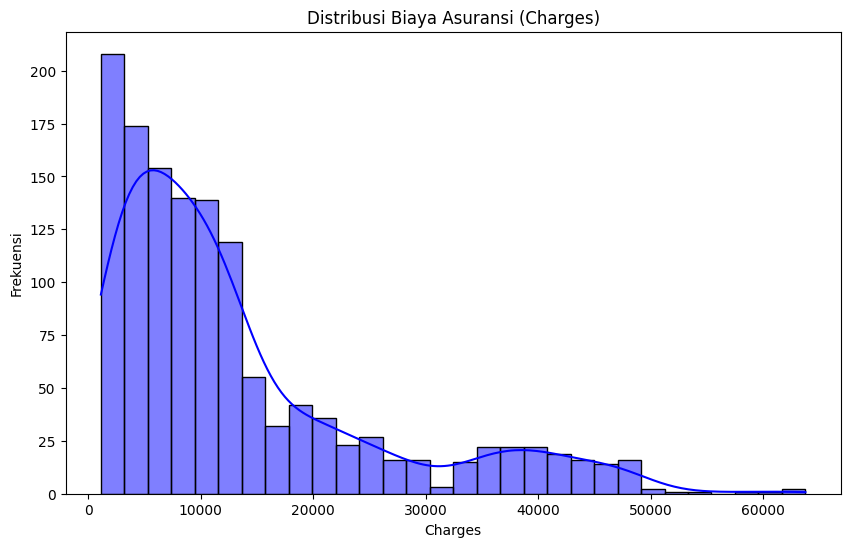

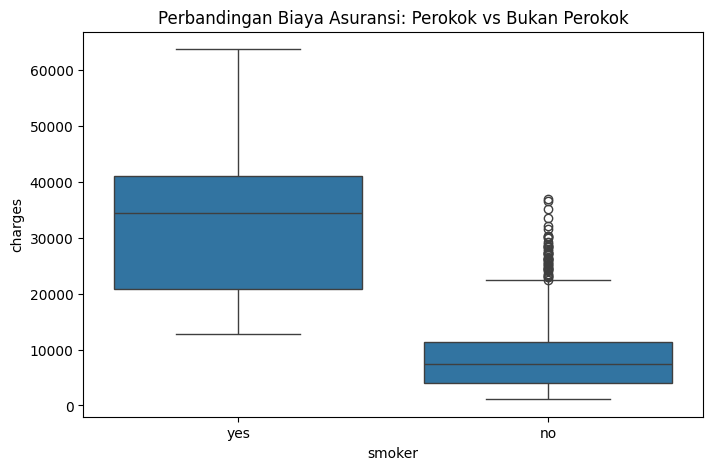

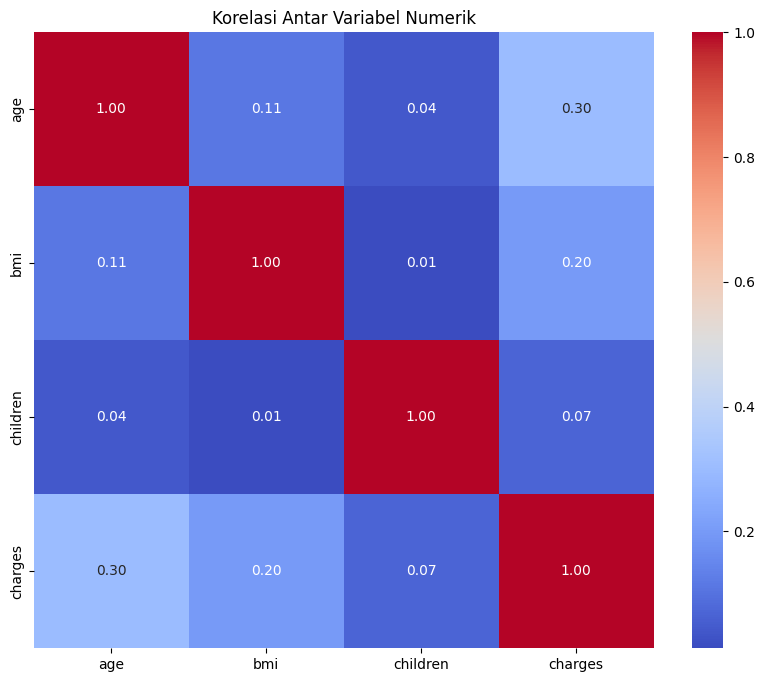

In [3]:
display(df.describe())

# Cek Missing Value
print(f"\nJumlah Missing Value per Kolom:{df.isnull().sum()}")

# Cek Duplikasi Data
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# Visualisasi Distribusi Target
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribusi Biaya Asuransi (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi Hubungan Perokok vs Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Perbandingan Biaya Asuransi: Perokok vs Bukan Perokok')
plt.show()

# 6. Correlation Heatmap (Hanya untuk kolom numerik)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Memilih kolom angka
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Membuat salinan dataframe
df_clean = df.copy()

# Menangani Data Duplikat
df_clean.drop_duplicates(inplace=True)

# Encoding Data Kategorikal (Mengubah Teks jadi Angka)
# Encoding 'sex': female = 0, male = 1
le_sex = LabelEncoder()
df_clean['sex'] = le_sex.fit_transform(df_clean['sex'])

# Encoding 'smoker': no = 0, yes = 1
le_smoker = LabelEncoder()
df_clean['smoker'] = le_smoker.fit_transform(df_clean['smoker'])

# Encoding 'region': Menggunakan One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['region'], prefix='region')

# Mengubah kolom boolean hasil One-Hot Encoding menjadi int
for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        df_clean[col] = df_clean[col].astype(int)

# Menampilkan Hasil Akhir Preprocessing
print("\nData setelah preprocessing:")
display(df_clean.head())

# Cek tipe data
print("\nTipe data akhir:")
print(df_clean.dtypes)

# Simpan hasil preprocessing ke CSV
df_clean.to_csv('insurance_clean.csv', index=False)
print("\nFile 'insurance_clean.csv' berhasil disimpan")


Data setelah preprocessing:


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0



Tipe data akhir:
age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

File 'insurance_clean.csv' berhasil disimpan
